In [29]:
import os
import pandas as pd
import seaborn as sns
from scipy.stats import shapiro, monte_carlo_test
import scipy.stats as st
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt 
from stats_test import shapiro_test
from scipy.stats import f_oneway
from statstests.process import stepwise
from test_report import test_report
from scipy.stats import t, zscore

path = os.path.join(os.getcwd(), 'datasets','Birthweight.csv')
dataset = pd.read_csv(path, sep=',', decimal='.')
path = os.path.join(os.getcwd(), 'datasets','Cholesterol.csv')
dataset_cholesterol = pd.read_csv(path, sep=',', decimal='.')

dataset

,ID,Length,Birthweight,Headcirc,Gestation,smoker,mage,mnocig,mheight,mppwt,fage,fedyrs,fnocig,fheight,lowbwt,mage35
0,1360,56,4.55,34,44,0,20,0,162,57,23,10,35,179,0,0
1,1016,53,4.32,36,40,0,19,0,171,62,19,12,0,183,0,0
2,462,58,4.10,39,41,0,35,0,172,58,31,16,25,185,0,1
3,1187,53,4.07,38,44,0,20,0,174,68,26,14,25,189,0,0
4,553,54,3.94,37,42,0,24,0,175,66,30,12,0,184,0,0
5,1636,51,3.93,38,38,0,29,0,165,61,31,16,0,180,0,0
6,820,52,3.77,34,40,0,24,0,157,50,31,16,0,173,0,0
7,1191,53,3.65,33,42,0,21,0,165,61,21,10,25,185,0,0
8,1081,54,3.63,38,38,0,18,0,172,50,20,12,7,172,0,0
9,822,50,3.42,35,38,0,20,0,157,48,22,14,0,179,0,0


In [2]:
'''
In your own words, describe what a residual is in linear regression.
'''
print('''
A residual represents the difference between a predicted value and the corresponding experimental value for the same independent variable (or conjunt of indenpendent variable).
''')


A residual represents the difference between a predicted value and the corresponding experimental value for the same independent variable (or conjunt of indenpendent variable).



In [3]:
'''
Q2. If you know that your residual data follow the below pattern, are your data better approximated with a linear model for the lower values of independent variable or higher values of independent variable and why?
'''
print('''
Based on the figure, it’s clear that the model is more accurate at lower values of the independent variable. However, the model is likely heteroscedastic, making predictions in such cases unreliable.
''')


Based on the figure, it’s clear that the model is more accurate at lower values of the independent variable. However, the model is likely heteroscedastic, making predictions in such cases unreliable.



In [4]:
'''
Q3. What is the difference between R2 and adjusted R2?
'''
print(r'''R² generally increases when more predictors are added, even if they do not contribute meaningfully to the model. 
      Adjusted R², on the other hand, increases only if the new predictor improves the model more than would be expected by chance.''')


R² generally increases when more predictors are added, even if they do not contribute meaningfully to the model. 
      Adjusted R², on the other hand, increases only if the new predictor improves the model more than would be expected by chance.


In [5]:
'''
Q4. Is there independence of observations if you are trying to predict baby length with mother’s height?
Yes
No
'''

# Estimate and fit model

columns_model = [c for c in dataset.columns if c not in ['ID', 'Length']]
columns_model_string = " + ".join(columns_model)

model = sm.OLS.from_formula("Length ~ + " + columns_model_string, dataset).fit()

# Stepwise process
result = stepwise(model, pvalue_limit=0.05)


Regression type: OLS 

Estimating model...: 
 Length ~ Q('Birthweight') + Q('Headcirc') + Q('Gestation') + Q('smoker') + Q('mage') + Q('mnocig') + Q('mheight') + Q('mppwt') + Q('fage') + Q('fedyrs') + Q('fnocig') + Q('fheight') + Q('lowbwt') + Q('mage35')

 Discarding atribute "Q('fedyrs')" with p-value equal to 0.840191240229919 

Estimating model...: 
 Length ~ Q('Birthweight') + Q('Headcirc') + Q('Gestation') + Q('smoker') + Q('mage') + Q('mnocig') + Q('mheight') + Q('mppwt') + Q('fage') + Q('fnocig') + Q('fheight') + Q('lowbwt') + Q('mage35')

 Discarding atribute "Q('Headcirc')" with p-value equal to 0.7988220962807158 

Estimating model...: 
 Length ~ Q('Birthweight') + Q('Gestation') + Q('smoker') + Q('mage') + Q('mnocig') + Q('mheight') + Q('mppwt') + Q('fage') + Q('fnocig') + Q('fheight') + Q('lowbwt') + Q('mage35')

 Discarding atribute "Q('smoker')" with p-value equal to 0.7744358805948243 

Estimating model...: 
 Length ~ Q('Birthweight') + Q('Gestation') + Q('mage') + Q('m

In [6]:
'''
Q5. Justify the above answer.
'''

print('''
After step wise procedure,
      
only Birthweight,Gestation and mheight remained valid. Hence, mother’s height is a independent variable.

''')




After step wise procedure,
      
only Birthweight,Gestation and mheight remained valid. Hence, mother’s height is a independent variable.




As p-value is greater than 5%, 
 it is normally distributed.
The residual showed no correlation with the predictor data, and are normally distributed. Hence, there is no homoscedasticity. 


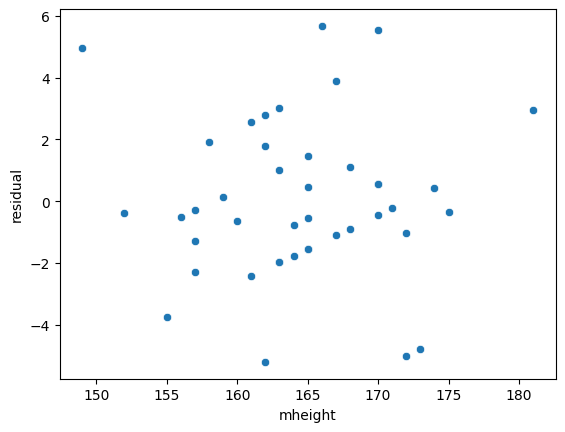

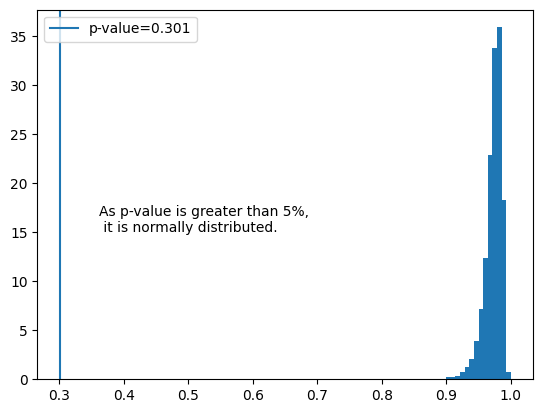

In [7]:
'''
Q6. Do residual data show homoscedasticity?
Yes
No
'''

model_len_mheight = sm.OLS.from_formula("Length ~ mheight", dataset).fit()

dataset['fittedvalues'] = model_len_mheight.fittedvalues
dataset['residual'] = model_len_mheight.fittedvalues - dataset['Length']

sns.scatterplot(data=dataset, x='mheight', y='residual')
model = sm.OLS.from_formula("residual ~ mheight", dataset).fit()
model.summary()

shapiro_test(dataset['residual'])

print("The residual showed no correlation with the predictor data, and are normally distributed. Hence, there is no homoscedasticity. ")


In [8]:
'''
Q8. What is the value of R2 and what does this tell you?
'''

print("Tthe r² of 0.235 tells 23.5% of the baby's length can be explained by mother's height.")
model_len_mheight.summary()





Tthe r² of 0.235 tells 23.5% of the baby's length can be explained by mother's height.


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Length   R-squared:                       0.235
Model:                            OLS   Adj. R-squared:                  0.216
Method:                 Least Squares   F-statistic:                     12.30
Date:                Fri, 08 Nov 2024   Prob (F-statistic):            0.00113
Time:                        18:39:46   Log-Likelihood:                -98.689
No. Observations:                  42   AIC:                             201.4
Df Residuals:                      40   BIC:                             204.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     15.3342     10.271      1.493      0.143      -5.425      36.093
mheight        0.2189      0.062      3.507      0.001       0.093       0.345
==============================================================================
Omnibus:                        0.736   Durbin-Watson:                   1.724
Prob(Omnibus):                  0.692   Jarque-Bera (JB):                0.358
Skew:                          -0.224   Prob(JB):                        0.836
Kurtosis:                       3.059   Cond. No.                     4.22e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.22e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [9]:
'''
Q9. Can you consider the relationship between mother’s height and baby length a statistically significant linear relationship and why?
'''
print('''
Yes, I can, once the p-value for the variable mheight is lower than 5%, after applying a t-test.
''')


Yes, I can, once the p-value for the variable mheight is lower than 5%, after applying a t-test.



In [10]:
'''
Q10. Having the ANOVA table for the linear regression in mind, what is the null and alternative hypothesis in this case?
'''
print('The null hypothesis is that the model is equal to the mean model (slope of the linear regression is zero); while the alternative hypothesis is that is greater than zero.')


The null hypothesis is that the model is equal to the mean model (slope of the linear regression is zero); while the alternative hypothesis is that is greater than zero.


In [11]:
'''
Q11. In your own words, describe what the b1 is.
'''
print("B1 is the coefficient that applies a linear transformation to the independent variable, relating it to the dependent variable.")

B1 is the coefficient that applies a linear transformation to the independent variable, relating it to the dependent variable.


In [12]:
'''
Q12. What does the value of b1 tell you in practical terms?
'''
print("In practical terms, this means that for each unit increase in the mother's height, the baby's length increases by 0.21 units.")

In practical terms, this means that for each unit increase in the mother's height, the baby's length increases by 0.21 units.


No, you can't. Because it is outside the range of fitted data.


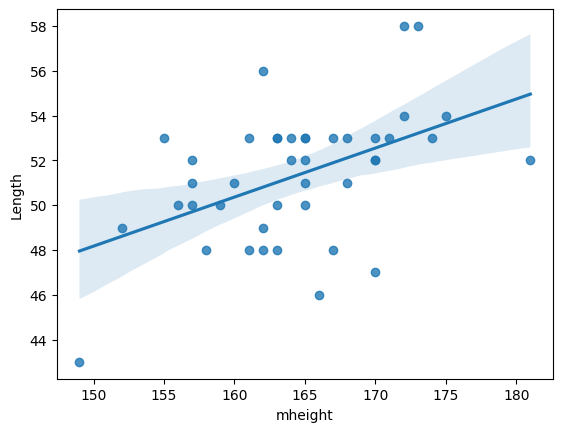

In [13]:
'''
Q13. Could you claim the same for the mother’s height in the range between 140cm and 145cm and why?

'''
sns.regplot(data=dataset, y='Length', x='mheight')

print("No, you can't. Because it is outside the range of fitted data.")

In [14]:
'''
Q14. According to this model, what is the prediction of baby length for mother’s height of 170cm?
'''
prediction_input = pd.DataFrame({'mheight': [170]})
predicted_length = model_len_mheight.predict(prediction_input)

print(f"The baby's length is {predicted_length[0]:.2f} cm.")

The baby's length is 52.55 cm.


In [15]:
'''
Q15. Report on your findings for predicting baby length with mother’s height.
'''
print(f"""A linear regression predicted the relationship between mother's height and baby's length with statistical significance (a t-test revealed a p-value of 0.001, which is < 5%).

With this model, the expected length of a baby whose mother has a height of 170 cm is:
y = {model_len_mheight.params['Intercept']:.2f} + {model_len_mheight.params['mheight']:.2f} * 170 = {predicted_length[0]:.2f} cm.
""")


A linear regression predicted the relationship between mother's height and baby's length with statistical significance (a t-test revealed a p-value of 0.001, which is < 5%).

With this model, the expected length of a baby whose mother has a height of 170 cm is:
y = 15.33 + 0.22 * 170 = 52.55 cm.




No you can't. The step-wise discarted the fheight featurem. Otherwise, after performing a linear regression, the b1 is not statiscally significant



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Length   R-squared:                       0.043
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                     1.815
Date:                Fri, 08 Nov 2024   Prob (F-statistic):              0.185
Time:                        18:39:46   Log-Likelihood:                -103.39
No. Observations:                  42   AIC:                             210.8
Df Residuals:                      40   BIC:                             214.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     35.5119     11.751      3.022      0.004      11.762      59.262
fheight        0.0877      0.065      1.347      0.185      -0.044       0.219
==============================================================================
Omnibus:                        0.880   Durbin-Watson:                   1.734
Prob(Omnibus):                  0.644   Jarque-Bera (JB):                0.234
Skew:                          -0.079   Prob(JB):                        0.890
Kurtosis:                       3.330   Cond. No.                     4.73e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.73e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

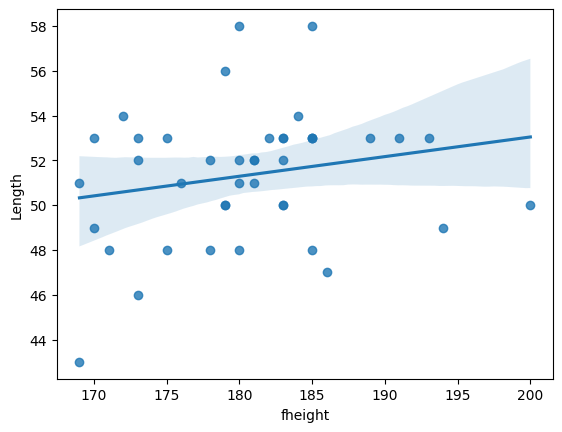

In [16]:
'''
Q16. Can you predict baby length with father’s age? Why?
'''
model_len_fheight = sm.OLS.from_formula("Length ~ fheight", dataset).fit()
print('''
No you can't. The step-wise discarted the fheight featurem. Otherwise, after performing a linear regression, the b1 is not statiscally significant
''')
sns.regplot(data=dataset, x='fheight', y='Length')
model_len_fheight.summary()

In [17]:
'''
Q17. What does homogeneity of variance mean and why is it important assumption of an independent t-test?
'''

print('''
Homogeneity of variance means that the variance within each group being compared is approximately equal. It is an important assumption
for t-test because both groups contribute equally to the overall variability in the data, ensuring that one group does not disproportionately influence the test results

''')


Homogeneity of variance means that the variance within each group being compared is approximately equal. It is an important assumption
for t-test because both groups contribute equally to the overall variability in the data, ensuring that one group does not disproportionately influence the test results




In [18]:
'''
Q18. Is there homogeneity of variance between head circumference for babies of smoking mothers and head circumference for babies of non-smoking mothers?
Yes
No
'''
print('Yes')

Yes


In [19]:
'''
Q19. Justify your choice.
'''
smokers = dataset[dataset['smoker']==1]['Headcirc']
non_smokers = dataset[dataset['smoker']==0]['Headcirc']
_, pvalue = f_oneway(smokers, non_smokers)

print(f"Once the p-value is {pvalue:.2f}>5%, we can conclude the two groups have distinct variances.")

Once the p-value is 0.25>5%, we can conclude the two groups have distinct variances.


In [20]:
'''
Q20. Do smokers have lighter babies? Justify your answer.
'''
smokers = dataset[dataset['smoker']==1]['Birthweight']
non_smokers = dataset[dataset['smoker']==0]['Birthweight']
test_report(smokers, non_smokers, outcome_label='lighter babies', predictor_1_label='smoker mothers', predictor_2_label='non smoker mothers')



            An independent-samples t-test was run to determine if there
            were differences in lighter babies for smoker mothers and
            non smoker mothers. The lighter babies was NOT shown to be statiscally different,
            as the pvalue were found to be 0.04
    


In [21]:
'''
Q21. Do women over 35 have lighter babies? Justify your answer.
'''
over35 = dataset[dataset['mage35']==1]['Birthweight']
Notover35 = dataset[dataset['mage35']==0]['Birthweight']
test_report(over35, Notover35, outcome_label='lighter babies', predictor_1_label='over 35 mothers', predictor_2_label='younger mothers')



            An independent-samples t-test was run to determine if there
            were differences in lighter babies for over 35 mothers and
            younger mothers. The lighter babies was shown to be higher
            for younger mothers (M = 3.33, SD = 0.58) than for 
            over 35 mothers (M = 3.11, SD = 0.90), a statistically significant
            difference, M = 0.22, 95% CI[3.14-3.52], 
            t(38) = 0.48, p = 0.49, d =3.88.
    


In [22]:
'''
Q22. Using the cholesterol dataset, was the diet effective in lowering cholesterol concentration after 8 weeks of use? Justify your answer.
'''
after8weeks = dataset_cholesterol['After8weeks']
before = dataset_cholesterol['Before']

test_report(after8weeks, before, outcome_label='cholesterol', predictor_1_label='diet (after 8 weeks)', predictor_2_label='before diet')


            An independent-samples t-test was run to determine if there
            were differences in cholesterol for diet (after 8 weeks) and
            before diet. The cholesterol was shown to be higher
            for before diet (M = 6.41, SD = 1.19) than for 
            diet (after 8 weeks) (M = 5.78, SD = 1.10), a statistically significant
            difference, M = 0.63, 95% CI[5.82-7.00], 
            t(18) = 2.70, p = 0.11, d =3.67.
    


In [23]:
'''
Q23. For the above case, what is the null and alternative hypothesis? 
'''
print('''
    The null result would signify no statiscal difference between the group that applied diet and the group that did not. 
''')


    The null result would signify no statiscal difference between the group that applied diet and the group that did not. 



In [24]:
'''
Q24. Was the diet more effective in the first 4 weeks of use or the last 4 weeks of use? Justify your answer.
'''
after4weeks = dataset_cholesterol['After4weeks']

test_report(after8weeks, after4weeks, 'cholesterol', 'first 4 weeks', 'last 4 weeks')

print("Hence, the first 4 weeks were more effective.")


            An independent-samples t-test was run to determine if there
            were differences in cholesterol for first 4 weeks and
            last 4 weeks. The cholesterol was shown to be higher
            for last 4 weeks (M = 5.84, SD = 1.12) than for 
            first 4 weeks (M = 5.78, SD = 1.10), a statistically significant
            difference, M = 0.06, 95% CI[5.28-6.40], 
            t(18) = 0.03, p = 0.87, d =3.74.
    
Hence, the first 4 weeks were more effective.


Performing a shapiro-wilk test to prove it is normally distributed:
As p-value is greater than 5%, 
 it is normally distributed.

 As the mean of the sample is bigger then the average population (3 mmol/L), being 6.41 mmol/L, out sample is worse in therms of cholesterol.





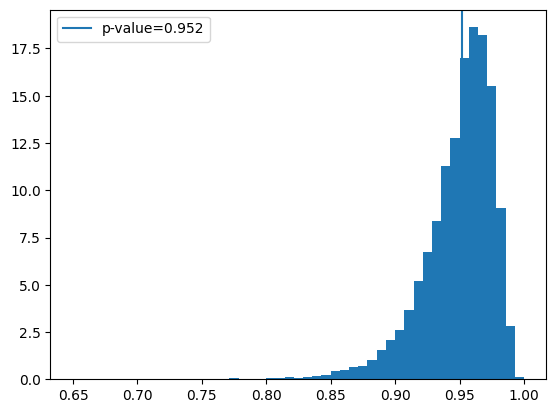

In [32]:
'''
Q25. If you know that the average cholesterol concentration in healthy adults is 3 mmol/L, would you consider your sample (N=18) significantly better or worse than average adult population? Justify your answer.
'''
print("Performing a shapiro-wilk test to prove it is normally distributed:")
shapiro_test(dataset_cholesterol['Before'])

print(f'''
 As the mean of the sample is bigger then the average population (3 mmol/L), being {dataset_cholesterol['Before'].mean():.2f} mmol/L, out sample is worse in therms of cholesterol.


''')
